In [1]:
import pandas as pandas # procesamiento de datos
from sklearn.ensemble import RandomForestClassifier # modelo de clasificación
from sklearn.metrics import accuracy_score # métrica de evaluación de modelos   
from sklearn.model_selection import train_test_split # partición de datos en entrenamiento y prueba
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score # métricas de evaluación de modelos 
import matplotlib.pyplot as plt # visualización de datos
from sklearn.metrics import confusion_matrix # confusion matrix para evaluar el modelo y ver donde se equivoca 
import seaborn as sns # visualización de datos con seaborn 
from sklearn.model_selection import learning_curve # curva de aprendizaje y validación ayuda a ver si el modelo esta sobreajustado o subajustado
import numpy as numpy # procesamiento de datos numéricos

In [3]:
data = pandas.read_csv('datos/migracion_datos_2023.csv')  

features = ['Number Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing', 
            'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children']
target = 'Region' 

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Calcular recall
recall = recall_score(y_test, predictions, average='macro')
print("Recall:", recall)

# Calcular precision
precision = precision_score(y_test, predictions, average='macro', zero_division=0)
print("Precision:", precision)

# Calcular F1 score
f1 = f1_score(y_test, predictions, average='macro',zero_division=0)
print("F1 Score:", f1)

# Calcular AUC-ROC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print("AUC-ROC:", roc_auc)

Recall: 0.20731594794094793
Precision: 0.2253762630811811
F1 Score: 0.2036610275620108
AUC-ROC: 0.6846431474008791


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Definir la métrica de evaluación
scorer = make_scorer(accuracy_score)

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5, n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor conjunto de hiperparámetros
best_params = grid_search.best_params_

# Entrenar un nuevo modelo con los mejores hiperparámetros
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Evaluar el rendimiento del modelo con los mejores hiperparámetros
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Precisión del modelo con los mejores hiperparámetros:", accuracy)


Precisión del modelo con los mejores hiperparámetros: 0.4266666666666667


----------------------------------------------------------------------------------------------------------------------

La curva de aprendizaje muestra cómo cambia el rendimiento del modelo a medida que aumenta el tamaño del conjunto de entrenamiento. Puedes visualizar la curva de aprendizaje utilizando la función learning_curve de sklearn.model_selection. Aquí te muestro cómo hacerlo:

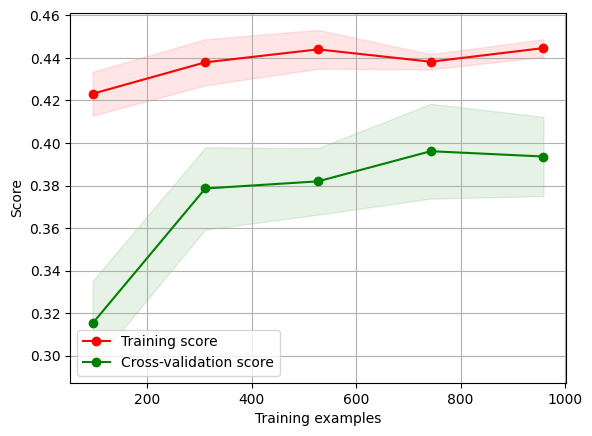

In [5]:
# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5)

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = numpy.mean(train_scores, axis=1)
train_scores_std = numpy.std(train_scores, axis=1)
test_scores_mean = numpy.mean(test_scores, axis=1)
test_scores_std = numpy.std(test_scores, axis=1)

# Visualizar la curva de aprendizaje
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

La curva de validación es una herramienta para visualizar el rendimiento de un modelo en función de sus hiperparámetros. Puedes visualizar la curva de validación utilizando la función validation_curve de sklearn.model_selection. Aquí te muestro cómo hacerlo para el hiperparámetro n_estimators:

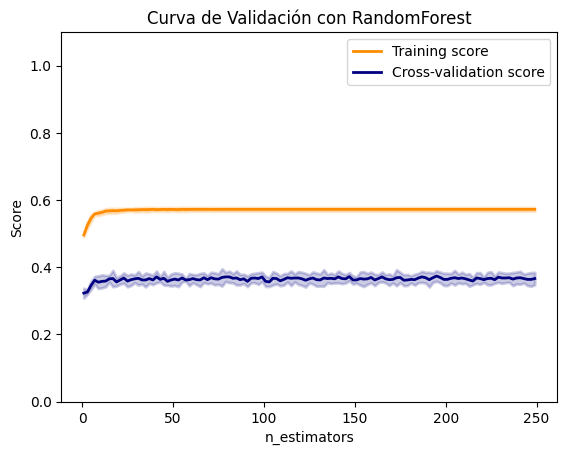

In [6]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Definir los valores del hiperparámetro a probar
param_range = np.arange(1, 250, 2)

# Calcular la curva de validación
train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X_train, y_train, param_name="n_estimators", param_range=param_range,
    scoring="accuracy", n_jobs=-1)

# Calcular la media y la desviación estándar de las puntuaciones de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Visualizar la curva de validación
plt.figure()
plt.title("Curva de Validación con RandomForest")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

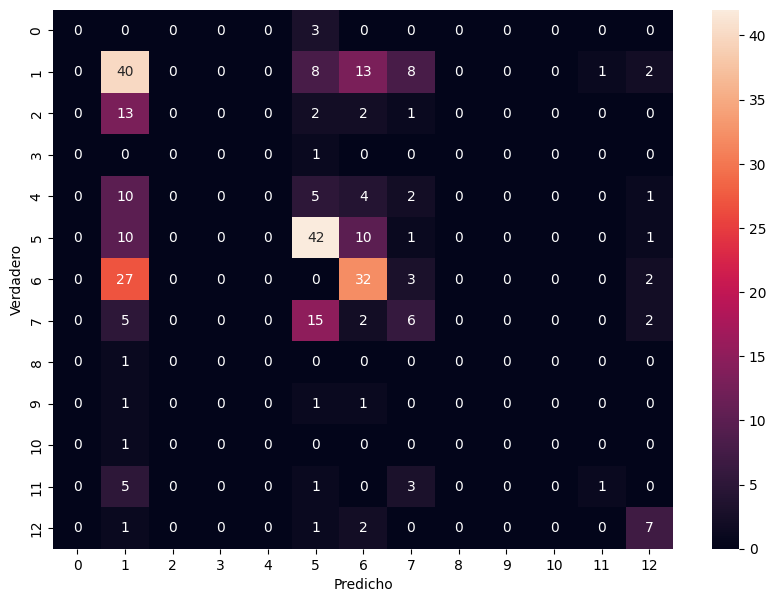

In [7]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()